# 学习Pandas，第 1 课
> 英文原文: [01 - Lesson](http://nbviewer.ipython.org/urls/bitbucket.org/hrojas/learn-pandas/raw/master/lessons/01%20-%20Lesson.ipynb)

**创建数据** - 我们从创建自己的数据开始。 这避免了阅读这个教程的用户需要去下载任何文件来重现结果。我们将会把这些数据导出到一个文本文件中这样你就可以试着从这个文件中去读取数据。  
**获取数据** - 我们将学习如何从文本文件中读取数据。 这些数据包含了1880年出生的婴儿数以及他们使用的名字。  
**准备数据** - 这里我们将简单看一下数据并确保数据是干净的，就是说我们将看一下文件中的数据并寻找一些可能异常的数据。 这可能包括了数据缺失(missing data)，数据不一致(inconsistant)，或者在正常范围之外(out of place)。 如果有这样的数据，我们将决定如何处置这些数据。  
**分析数据** - 我们将简单地找出一个给定年份中最热门的名字。  
**表现数据** - 通过表格和图形，向用户清晰地展示在一个给定的年份中最热门的名字。  


> 除了数据展现的一小部分，***pandas*** 库在数据分析的全过程中将被使用。 ***matplotlib*** 只在数据展现部分使用到。 课程的第一步则导入所需要的库。

In [1]:
# 导入所有需要的库

# 导入一个库中制定函数的一般做法: 
##from (library) import (specific library function)
from pandas import DataFrame, read_csv

# 导入一个库的一般做法: 
##import (library) as (give the library a nickname/alias)
import matplotlib.pyplot as plt
import pandas as pd #导入pandas的常规做法
import sys #导入sys库只是为了确认一下Python的版本
import matplotlib #这样导入matplotlib只是为了显示一下其版本号

# 初始化matplotlib，用inline方式显示图形
%matplotlib inline

In [2]:
print('Python version ' + sys.version)
print('Pandas version ' + pd.__version__)
print('Matplotlib version ' + matplotlib.__version__)

Python version 3.6.1 | packaged by conda-forge | (default, Mar 23 2017, 21:57:00) 
[GCC 4.2.1 Compatible Apple LLVM 6.1.0 (clang-602.0.53)]
Pandas version 0.19.2
Matplotlib version 2.0.2


## 创建数据 

这个简单的数据集包括了：1880年出生的，5个常用的婴儿的名字，以及对应的婴儿数量。

In [3]:
# 初始数据集: 婴儿名字和出生率
names = ['Bob','Jessica','Mary','John','Mel']
births = [968, 155, 77, 578, 973]

用 ***zip*** 函数将这两个列表合并在一起。

In [4]:
# 查看一下zip函数的帮助
zip?

In [5]:
BabyDataSet = list(zip(names, births))
BabyDataSet

[('Bob', 968), ('Jessica', 155), ('Mary', 77), ('John', 578), ('Mel', 973)]

我们已经完成了一个基本的数据集的创建。 我们现在用 ***pandas*** 将这些数据导出到一个 csv 文件中。

***df*** 是一个 ***DataFrame***对象。 你可以把这个对象理解为包含了 `BabyDataset` 的内容而格式非常象一个 sql 表格或者 Excel 的数据表。 让我们看看 ***df*** 中的内容。

In [6]:
df = pd.DataFrame(data = BabyDataSet, columns=['Names', 'Births'])
df

,Names,Births
0,Bob,968
1,Jessica,155
2,Mary,77
3,John,578
4,Mel,973


将 dataframe 导出到一个 ***csv*** 文件中。 我们将导出文件命名为 ***births1880.csv***。 导出 csv 文件的函数是 ***to_csv***。 除非你指定了其他的文件目录，否则导出的文件将保存在和 notebook 文件相同的位置。

In [7]:
# 查看一下 to_csv 的帮助
df.to_csv?

我们会使用的参数是 ***index*** 和 ***header***。 将这两个参数设置为 `False` 将会防止索引(index)和列名(header names)被导出到文件中。 你可以试着改变这两个参数值来更好的理解这两个参数的作用。

In [8]:
df.to_csv('births1880.csv', index=False, header=False)

## 获取数据

我们将使用 pandas 的 ***read_csv*** 函数从 csv 文件中获取数据。 我们先看看这个函数的帮助以及它需要什么参数。

In [9]:
read_csv?

这个函数有很多的参数，但我们目前只需要文件的位置。

***注意:*** 取决于你把 notebook 保存在什么位置，你也许需要修改一下文件的位置。

In [10]:
Location = r'./births1880.csv' #从 notebook 当前的位置读取 csv 文件
df = pd.read_csv(Location)

注意字符串之前的 ***r*** 。 因为斜线(slash)是一个特殊字符，在字符串之前放置前导的 ***r*** 将会把整个字符串进行转义(escape)。

In [11]:
df

,Bob,968
0,Jessica,155
1,Mary,77
2,John,578
3,Mel,973


这里出现了一个问题。 ***read_csv*** 函数将 csv 文件中的第一行作为了每列的列名(head names)。 这明显不对，因为数据文件没有提供列名。

要修正这个错误，我们需要给 ***read_csv*** 函数传入 ***header*** 这个参数，并设置为 ***None*** (Python中 null 的意思)。

In [12]:
df = pd.read_csv(Location, header=None)
df

,0,1
0,Bob,968
1,Jessica,155
2,Mary,77
3,John,578
4,Mel,973


如果我们需要为每一列指定一个名字，我们可以传入另外一个参数 ***names***，同时去掉 ***header*** 这个参数。

In [13]:
df = pd.read_csv(Location, names=['Names', 'Births'])
df

,Names,Births
0,Bob,968
1,Jessica,155
2,Mary,77
3,John,578
4,Mel,973


你可以把数字 [0,1,2,3,4] 设想为 Excel 文件中的行标 (row number)。 在 pandas 中，这些是 ***索引 (index)*** 的一部分。 你可以把索引(index)理解为一个sql表中的主键(primary key)，但是索引(index)是可以重复的。

***[Names, Births]*** 是列名，和sql表或者Excel数据表中的列名(column header)是类似的。

> 现在可以把这个 csv 文件删除了。

In [14]:
import os
os.remove(Location)

## 准备数据

我们的数据包含了1880年出生的婴儿及其数量。 我们已经知道我们有5条记录而且没有缺失值(所有值都是非空 non-null 的)。

***Names*** 列是由字母和数字串组成的婴儿名字。 这一列也许会出现一些脏数据但我们现在不需要有太多顾虑。 ***Births*** 列应该是通过整型数字(integers)表示一个指定年份指定婴儿名字的出生率。 我们可以检查一下是否这一列的数字都是整型。这一列出现浮点型(float)是没有意义的。但我们不需要担心这一列出现任何可能的离群值(outlier)。

请注意在目前这个阶段，简单地看一下dataframe中的数据来检查"Names"列已经足够了。 在之后我们做数据分析的过程中，我们还有很多机会来发现数据中的问题。

In [15]:
# 查看每一列的数据类型
df.dtypes

Names     object
Births     int64
dtype: object

In [16]:
# 查看 Births 列的数据类型
df.Births.dtype

dtype('int64')

你看到 ***Births*** 列的数据类型是 ***inter64***，这意味着不会有浮点型(小数)或者字符串型出现在这列中。

## 分析数据

要找到最高出生率的婴儿名或者是最热门的婴儿名字，我们可以这么做。

* 将 dataframe 排序并且找到第一行
* 使用 ***max()*** 属性找到最大值

In [17]:
# 方法 1:
Sorted = df.sort_values(['Births'], ascending=False)
Sorted.head(1)

,Names,Births
4,Mel,973


In [18]:
# 方法 2:
df['Births'].max()

973

## 表现数据

我们可以将 ***Births*** 这一列标记在图形上向用户展示数值最大的点。 对照数据表，用户就会有一个非常直观的画面 ***Mel*** 是这组数据中最热门的婴儿名字。

pandas 使用非常方便的 ***plot()*** 让你用 dataframe 中的数据来轻松制图。 刚才我们在 Births 列找到了最大值，现在我们要找到 973 这个值对应的婴儿名字。

**每一部分的解释:**  
*df['Names']* - 这是完整的婴儿名字的列表，完整的 Names 列  
*df['Births']* - 这是1880年的出生率，完整的 Births 列  
*df['Births'].max()* - 这是 Births 列中的最大值  

`[df['Births'] == df['Births'].max()]` **的意思是** [在 Births 列中找到值是 973 的所有记录]  
`df['Names'][df['Births'] == df['Births'].max()]` **的意思是** 在 Names 列中挑选出 [Births 列的值等于 973]  (Select all of the records in the Names column **WHERE** [The Births column is equal to 973])


一个另外的方法是我们用过 ***排序过的*** dataframe: `Sorted['Names'].head(1).value`  

***str()*** 可以将一个对象转换为字符串。 

The most popular name


,Names,Births
4,Mel,973


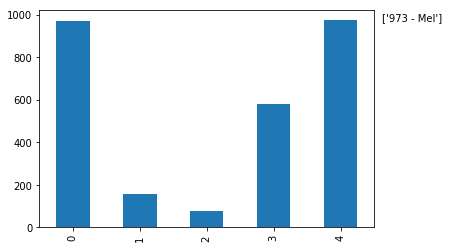

In [19]:
# 绘图
# df['Births'].plot()
df['Births'].plot.bar()  #这里改用的条形图更直观

# Births 中的最大值
MaxValue = df['Births'].max()

# 找到对应的 Names 值
MaxName = df['Names'][df['Births'] == df['Births'].max()].values

# 准备要显示的文本
Text = str(MaxValue) + " - " + MaxName

# 将文本显示在图形中
plt.annotate(Text, xy=(1, MaxValue), xytext=(8, 0), 
                 xycoords=('axes fraction', 'data'), textcoords='offset points')

print("The most popular name")
df[df['Births'] == df['Births'].max()]
#Sorted.head(1) can also be used

<p class="text-muted">This tutorial was created by <a href="http://www.hedaro.com" target="_blank"><strong>HEDARO</strong></a></p>

<p class="text-muted">本教程由<a href="http://datarx.cn" target="_blank"><strong>派兰数据</strong></a>翻译</p>